In [19]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
N = 100000
stats = np.loadtxt("us_birth_69_88.csv", skiprows=1, delimiter=',', dtype=int)

In [21]:
%%time

def emp_dates(num_of_days: int, birth_data, max_count: int) -> int:
    R = np.random.randint(0, num_of_days - 1, num_of_days)
    X = np.random.randint(1, max_count, num_of_days)
    res_arr = R[X <= birth_data[R]]
    s = set()
    for k in range(num_of_days):
        if res_arr[k] in s:
            return k + 1
        else:
            s.add(res_arr[k])

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.2 µs


In [22]:
%%time

size = stats.shape[0]
birth_data = stats[ :, 2]
max_count = np.max(birth_data)
emp_sample = [emp_dates(size, birth_data, max_count) for _ in range(N)]

CPU times: user 6.58 s, sys: 7.89 ms, total: 6.59 s
Wall time: 6.59 s


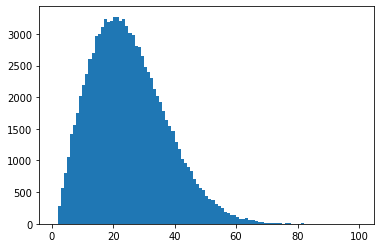

In [23]:
plt.hist(emp_sample, bins=range(1, 101))
plt.show()